## **Setup**

In [1]:
from sklearn.datasets import load_sample_images
import tensorflow as tf
import matplotlib.pyplot as plt

## **Data Import**

In [2]:
images = load_sample_images()['images']

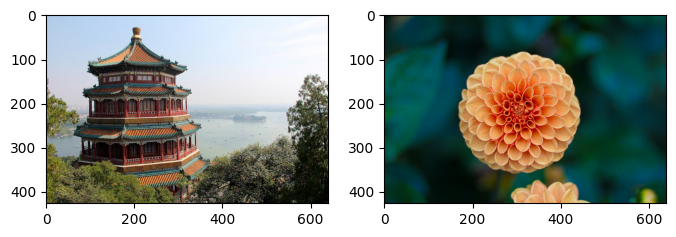

In [7]:
plt.figure(figsize=(8,7))

plt.subplot(1,2,1)
plt.imshow(images[0])

plt.subplot(1,2,2)
plt.imshow(images[1])

plt.show()

## **Center Crop & Rescaling Layer**

In [8]:
images = tf.keras.layers.CenterCrop(height=70,width=120)(images)
images = tf.keras.layers.Rescaling(scale=1/255)(images)

images.shape

TensorShape([2, 70, 120, 3])

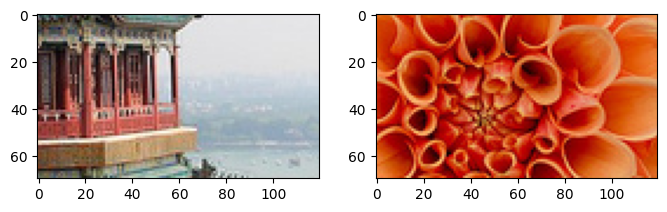

In [9]:
plt.figure(figsize=(8,7))

plt.subplot(1,2,1)
plt.imshow(images[0])

plt.subplot(1,2,2)
plt.imshow(images[1])

plt.show()

# **Convolution Layer WO Padding**

In [11]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7) # Padding = 'valid' [Default]
display(conv_layer)

fmaps = conv_layer(images)
fmaps.shape  # Output Shape != Input Shape

<Conv2D name=conv2d_1, built=False>

TensorShape([2, 64, 114, 32])

In [15]:
# Display Feature Maps For First Image
display(fmaps[0])

<tf.Tensor: shape=(64, 114, 32), dtype=float32, numpy=
array([[[ 0.12306308, -0.05232972,  0.04252812, ...,  0.03002135,
          0.05143488,  0.0109741 ],
        [ 0.08651312, -0.01064969,  0.06199416, ...,  0.02153335,
          0.04370851,  0.02942114],
        [ 0.07067371,  0.0087215 ,  0.08197095, ...,  0.07052593,
          0.01948454,  0.02343061],
        ...,
        [ 0.28515422, -0.09975122,  0.00958474, ...,  0.05247146,
         -0.07838496,  0.1350354 ],
        [ 0.28506652, -0.09866619,  0.01082161, ...,  0.05074659,
         -0.07817159,  0.13384928],
        [ 0.28584495, -0.09816262,  0.00983502, ...,  0.05031695,
         -0.07774123,  0.13385187]],

       [[ 0.06490098, -0.01487686, -0.04084671, ...,  0.05033918,
         -0.02065053, -0.00529122],
        [ 0.02133516, -0.04296262,  0.03348218, ...,  0.02100524,
         -0.02669548,  0.09704941],
        [ 0.07185974, -0.03621475, -0.00574374, ...,  0.05652083,
         -0.05884439,  0.00832502],
        ...,

# **Convolution Layer WT Padding**

In [16]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7,padding='same')
display(conv_layer)

fmaps = conv_layer(images)
fmaps.shape  # Output Shape = Input Shape

<Conv2D name=conv2d_2, built=False>

TensorShape([2, 70, 120, 32])

# **Using Pre-Trained Models**

In [ ]:
import tensorflow_datasets as tfds

dataset, info = tfds.load('tf_flowers', as_supervised=True, with_info=True)
